# cleanup rtsys source data

In [1]:
import glob

# cognac data and tools
import cognac.insitu as insi

---
## load and select data

In [2]:
# data directory and filename
#
cp = insi.utils.campaign('microco_leg2.yaml')
data_dir = cp['source']['path']+'log/180911/'

files = sorted(glob.glob(data_dir+'*.txt')) #[:2]

#source = insi.source.source_rtsys(files[1], verbose=-1)
source_all = insi.source.source_rtsys()
for f in files:
    source_all += insi.source.source_rtsys(f)

Reads /Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/source/log/180911/mission_2018-09-11_06-00-43.txt
Reads /Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/source/log/180911/mission_2018-09-11_06-18-40.txt
Reads /Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/source/log/180911/mission_2018-09-11_09-39-51.txt
Reads /Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/source/log/180911/mission_2018-09-11_09-51-15.txt
Reads /Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/source/log/180911/mission_2018-09-11_13-15-26.txt
Reads /Users/aponte/Current_projects/cognac/campagnes_techno/2018_microco/leg2/data/source/log/180911/mission_2018-09-11_14-25-54.txt


In [3]:
source_all.sort()
source_all.drop_duplicates()
source_all.gps.compute_velocity()

In [4]:
source_all.gps.d.head()

,lon,lat,velocity
time,,,
2018-09-11 06:01:02,6.197246,42.877288,NaN
2018-09-11 06:01:03,6.197250,42.877298,1.139581
2018-09-11 06:01:04,6.197241,42.877281,2.045611
2018-09-11 06:01:05,6.197232,42.877278,0.822422
2018-09-11 06:01:06,6.197229,42.877276,0.314964


In [5]:
gp = source_all.gps.resample('1T')
gp.plot_bk()

Loading BokehJS ...

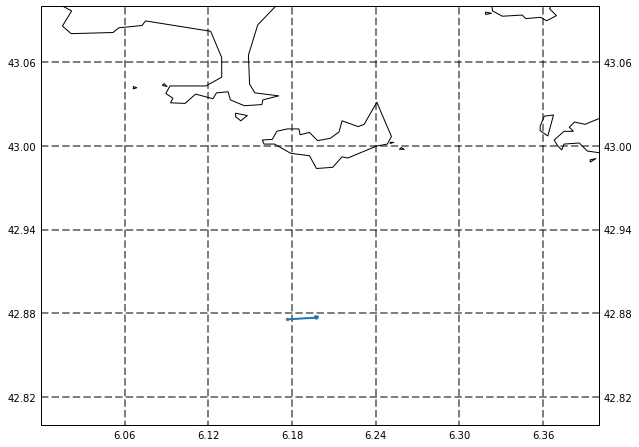

In [7]:
fac = insi.utils.plot_map(cp=cp)
source_all.gps.plot(fac)

In [4]:
# clean gps data with deployment log
source={}
for s in cp['source']:
    source[s.label] = source_all.clean(s, inplace=False)

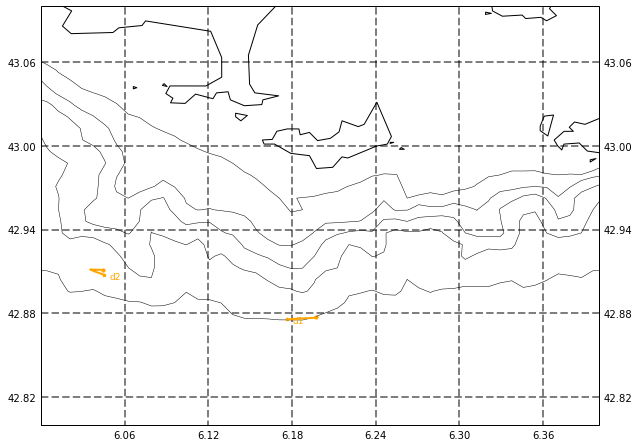

In [5]:
# plot overview map
fac = insi.utils.plot_map(cp=cp)
insi.utils.plot_bathy(fac)
for label, ls in source.items():
    print(ls.gps)
    ls.gps.plot(fac, label=label, color=cp['source']['color'])

---
## store

In [ ]:
for label, lsource in source.items():
    lsource.to_pickle(cp.pathp+'source_log_'+label+'.p')